# Naive Bayes Classifier

### Introduction:
Naive Bayes is a simple yet powerful machine learning algorithm used for classification tasks, particularly in natural language processing (NLP) and text classification. It is based on Bayes' theorem, a probabilistic model that calculates the probability of a particular event occurring based on prior knowledge of conditions that might be related to the event.

### Key Concepts:

**Bayes' Theorem**: At the core of Naive Bayes is Bayes' theorem, which is represented as:

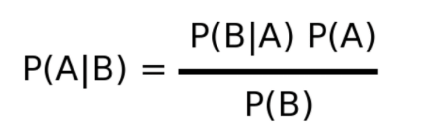

Where:

P(A∣B) is the probability of event A occurring given that event B has occurred.
P(B∣A) is the probability of event B occurring given that event A has occurred.
P(A) is the prior probability of event A.
P(B) is the prior probability of event B.

**Conditional Independence**: The "naive" assumption in Naive Bayes is that features (attributes) are conditionally independent, meaning that the presence or absence of one feature does not affect the presence or absence of another feature. This simplifies the calculations significantly.

### Working Principles:

**Training**: In the training phase, the algorithm learns the probabilities of each feature occurring in each class from the given dataset. This involves calculating two main probabilities:
    1. Class Probability P(C): The probability of each class occurring in the dataset.
    2. Feature Probability P(Xi|c): The probability of each feature occurring within each class.

**Classification**: In the classification phase, given a new data point with a set of features, the algorithm calculates the probability of the data point belonging to each class using Bayes' theorem. The class with the highest probability is assigned as the predicted class for the input data.

### Applications:

Naive Bayes is widely used in various applications, including:

Text Classification: Spam email detection, sentiment analysis, topic classification, and language identification.
Recommendation Systems: Recommending products, movies, or content to users based on their preferences.
Medical Diagnosis: Identifying diseases based on patient symptoms and medical test results.
Image Classification: Classifying images into categories.
Customer Segmentation: Grouping customers based on purchasing behavior.

### Advantages:

- Simplicity: Naive Bayes is easy to understand and implement.
- Efficiency: It is computationally efficient and works well with high-dimensional data.
- Good with Small Datasets: It can perform well even with limited training data.
- Handles Categorical Data: Naive Bayes can handle both numerical and categorical data.

### Limitations:

- Naive Assumption: The assumption of conditional independence is often not true in real-world datasets, which can lead to suboptimal results.
- Sensitivity to Feature Correlation: It may not perform well when features are strongly correlated.
- Zero Probability Issue: If a feature is not observed in a particular class in the training data, the algorithm assigns a probability of zero, which can cause issues.
- Requires Sufficient Data: It performs best when sufficient data is available for accurate probability estimation.

************************************************************************

# Project Title: Movie Review Sentiment Analysis with Naive Bayes

### Project Overview:

In this project, we will develop a machine learning model to perform sentiment analysis on movie reviews. Sentiment analysis, also known as opinion mining, is the process of determining the emotional tone or sentiment expressed in a piece of text. Specifically, we will classify movie reviews as either having a positive sentiment or a negative sentiment.

### Project Goals:

1. Data Collection and Preparation:

Obtain the IMDb Movie Reviews dataset, which consists of text-based movie reviews labeled with sentiment (positive or negative).
Perform data preprocessing, including text cleaning, tokenization, and numerical representation of text data.

2. Exploratory Data Analysis (EDA):

Analyze the dataset's structure, including the distribution of sentiment labels (positive vs. negative).
Visualize the sentiment distribution to gain insights into the dataset.

3. Model Building:

Implement a sentiment analysis model using the Naive Bayes classifier.
Use the CountVectorizer to convert text reviews into numerical features.
Split the dataset into training and testing sets for model training and evaluation.

4. Model Training:

Train the Naive Bayes classifier on the training data.
Utilize the Multinomial Naive Bayes algorithm, which is well-suited for text classification tasks.

5. Model Evaluation:

Evaluate the model's performance on the test dataset.
Calculate accuracy, precision, recall, and F1-score.
Generate a confusion matrix to assess classification performance.

6. Visualization:

Visualize the confusion matrix with annotated values to understand the model's true positive, true negative, false positive, and false negative predictions.

### Expected Results:

By the end of this project, you will have a well-trained sentiment analysis model that can classify movie reviews as either positive or negative. You will also gain insights into the model's performance through various evaluation metrics and visualizations.

### Skills Demonstrated:

Data preprocessing and cleaning.
Exploratory data analysis.
Text classification using the Naive Bayes algorithm.
Model training and evaluation.
Data visualization for performance assessment.

### Prerequisites:

- Python programming skills.
- Knowledge of machine learning concepts, particularly Naive Bayes.
- Familiarity with libraries like scikit-learn, pandas, numpy, matplotlib, and seaborn.
- Access to the IMDb Movie Reviews dataset.


**Note:** Ensure that you have downloaded the IMDb Movie Reviews dataset or a similar dataset before starting the project.

This project will provide you with hands-on experience in natural language processing and sentiment analysis, which are valuable skills in various industries, including marketing, customer feedback analysis, and social media monitoring.

In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Access a specific folder in your Google Drive
path = "/content/drive/MyDrive/Dataset/IMDB Dataset.csv"
# Load dataset
data = pd.read_csv(path)

In [12]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [13]:
data.columns

Index(['review', 'sentiment'], dtype='object')

In [15]:
# Check the distribution of sentiment labels
sentiment_counts = data['sentiment'].value_counts()
print(sentiment_counts)

positive    25000
negative    25000
Name: sentiment, dtype: int64


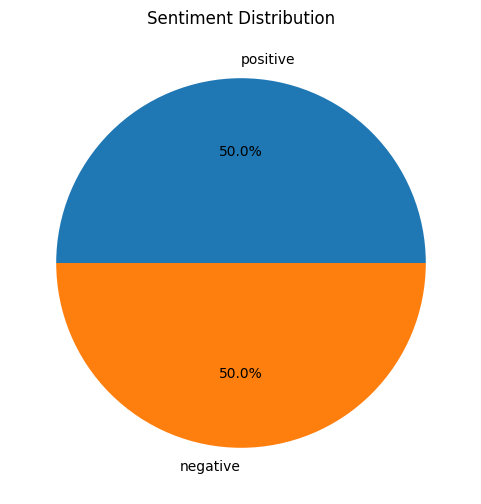

In [17]:
# Visualize the sentiment distribution
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

In [19]:
# Convert text reviews into numerical features using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['review'])

In [20]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['sentiment'], test_size=0.2, random_state=42)

In [21]:
# Initialize and train the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [22]:
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

In [23]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.85


In [24]:
# Generate a classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

    negative       0.83      0.88      0.85      4961
    positive       0.87      0.82      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [25]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

Confusion Matrix:
 [[4360  601]
 [ 912 4127]]


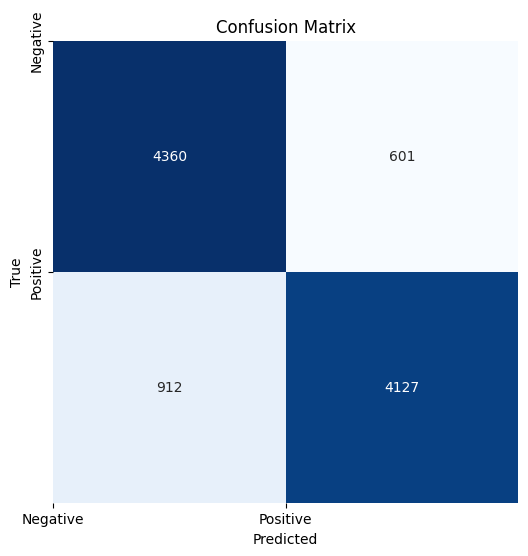

In [28]:
import seaborn as sns

# Visualize the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()